<a href="https://colab.research.google.com/github/n-miera/Vehicle-accident-prediction/blob/main/Data_exploration_by_state_and_injury_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vehicle accident prediction algorithm

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io

#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

accident_df_raw = pd.read_csv(io.BytesIO(uploaded['accident_ds.csv']))

Saving accident_ds.csv to accident_ds (4).csv


In [ ]:
#a = pd.read_csv("/content/accident_ds.csv")
#a

In [ ]:
accident_df_raw

,TAHUN,NEGERI,JUMLAH \nKMLG,JUMLAH \nKMLG \nMAUT,JUMLAH \nKMLG \nPARAH,JUMLAH \nKMLG \nRINGAN,JUMLAH \nKMLG \nROSAK \nSAHAJA,JUMLAH \nKEMATIAN,JUMLAH \nCEDERA \nPARAH,JUMLAH \nCEDERA \nRINGAN
0,2011,PERLIS,1791,73,231,246,1241,79,259,288
1,2011,KEDAH,19699,506,499,1023,17671,515,608,1329
2,2011,PULAU PINANG,37158,375,160,320,36303,392,197,380
3,2011,PERAK,33506,739,700,1267,30800,811,898,1631
4,2011,SELANGOR,128876,1015,457,689,126715,1070,566,807
...,...,...,...,...,...,...,...,...,...,...
135,2021,PAHANG,8071,161,109,501,7300,176,129,189
136,2021,KELANTAN,4403,130,91,794,3388,133,102,803
137,2021,TERENGGANU,4539,93,71,87,4288,106,80,89
138,2021,SABAH,7159,99,90,107,6863,118,106,122


## Renaming columns

In [ ]:
#.rename
accident_df = accident_df_raw.rename(
        columns = {'TAHUN':'Year'
                   ,'NEGERI':'State'
                   ,'JUMLAH \nKMLG':'Total accident'
                   ,'JUMLAH \nKMLG \nMAUT':'Total death accident'
                   ,'JUMLAH \nKMLG \nPARAH':'Total critical accident'
                   ,'JUMLAH \nKMLG \nRINGAN':'Total minor accident'
                   ,'JUMLAH \nKMLG \nROSAK \nSAHAJA':'Total damage only accident'
                   ,'JUMLAH \nKEMATIAN':'Total death'
                   ,'JUMLAH \nCEDERA \nPARAH':'Total minor injury'
                   ,'JUMLAH \nCEDERA \nRINGAN':'Total major injury'
                   }
        )
accident_df

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
0,2011,PERLIS,1791,73,231,246,1241,79,259,288
1,2011,KEDAH,19699,506,499,1023,17671,515,608,1329
2,2011,PULAU PINANG,37158,375,160,320,36303,392,197,380
3,2011,PERAK,33506,739,700,1267,30800,811,898,1631
4,2011,SELANGOR,128876,1015,457,689,126715,1070,566,807
...,...,...,...,...,...,...,...,...,...,...
135,2021,PAHANG,8071,161,109,501,7300,176,129,189
136,2021,KELANTAN,4403,130,91,794,3388,133,102,803
137,2021,TERENGGANU,4539,93,71,87,4288,106,80,89
138,2021,SABAH,7159,99,90,107,6863,118,106,122


In [ ]:
print(accident_df["State"].unique())

['PERLIS ' 'KEDAH ' 'PULAU PINANG ' 'PERAK ' 'SELANGOR' 'KUALA LUMPUR '
 'NEGERI SEMBILAN ' 'MELAKA ' 'JOHOR ' 'PAHANG ' 'KELANTAN ' 'TERENGGANU '
 'SABAH  ' 'SARAWAK ' 'PERLIS' 'KEDAH' 'PERAK' 'PULAU PINANG'
 'KUALA LUMPUR' 'MELAKA' 'JOHOR' 'PAHANG' 'KELANTAN' 'TERENGGANU' 'SABAH'
 'SARAWAK']


In [ ]:
accident_df["State"]

0            PERLIS 
1             KEDAH 
2      PULAU PINANG 
3             PERAK 
4           SELANGOR
           ...      
135           PAHANG
136         KELANTAN
137       TERENGGANU
138            SABAH
139          SARAWAK
Name: State, Length: 140, dtype: object

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
kedah = accident_df[accident_df["State"] == "KEDAH"]

kedah

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
1,2011,KEDAH,19699,506,499,1023,17671,515,608,1329
15,2012,KEDAH,19935,529,475,1036,17895,548,486,1074
29,2013,KEDAH,20228,487,379,787,18575,517,403,881
43,2014,KEDAH,20159,495,362,863,18439,525,365,867
57,2015,KEDAH,22016,502,296,873,20345,530,301,884
71,2017,KEDAH,23262,528,187,654,21893,560,204,666
85,2018,KEDAH,23239,478,213,566,21982,509,218,579
99,2019,KEDAH,24867,439,219,768,23441,446,220,779
113,2020,KEDAH,19651,343,149,1008,18151,354,153,1010
127,2021,KEDAH,10632,218,101,588,9725,231,102,720


In [ ]:
# Sorting data in ascending order by the date
kedah = kedah.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
kedah.set_index('Year', inplace=True)

kedah

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,KEDAH,19699,506,499,1023,17671,515,608,1329
2012,KEDAH,19935,529,475,1036,17895,548,486,1074
2013,KEDAH,20228,487,379,787,18575,517,403,881
2014,KEDAH,20159,495,362,863,18439,525,365,867
2015,KEDAH,22016,502,296,873,20345,530,301,884
2017,KEDAH,23262,528,187,654,21893,560,204,666
2018,KEDAH,23239,478,213,566,21982,509,218,579
2019,KEDAH,24867,439,219,768,23441,446,220,779
2020,KEDAH,19651,343,149,1008,18151,354,153,1010


In [ ]:
# drop column state
kedah_df = kedah.drop(['State'],axis=1)


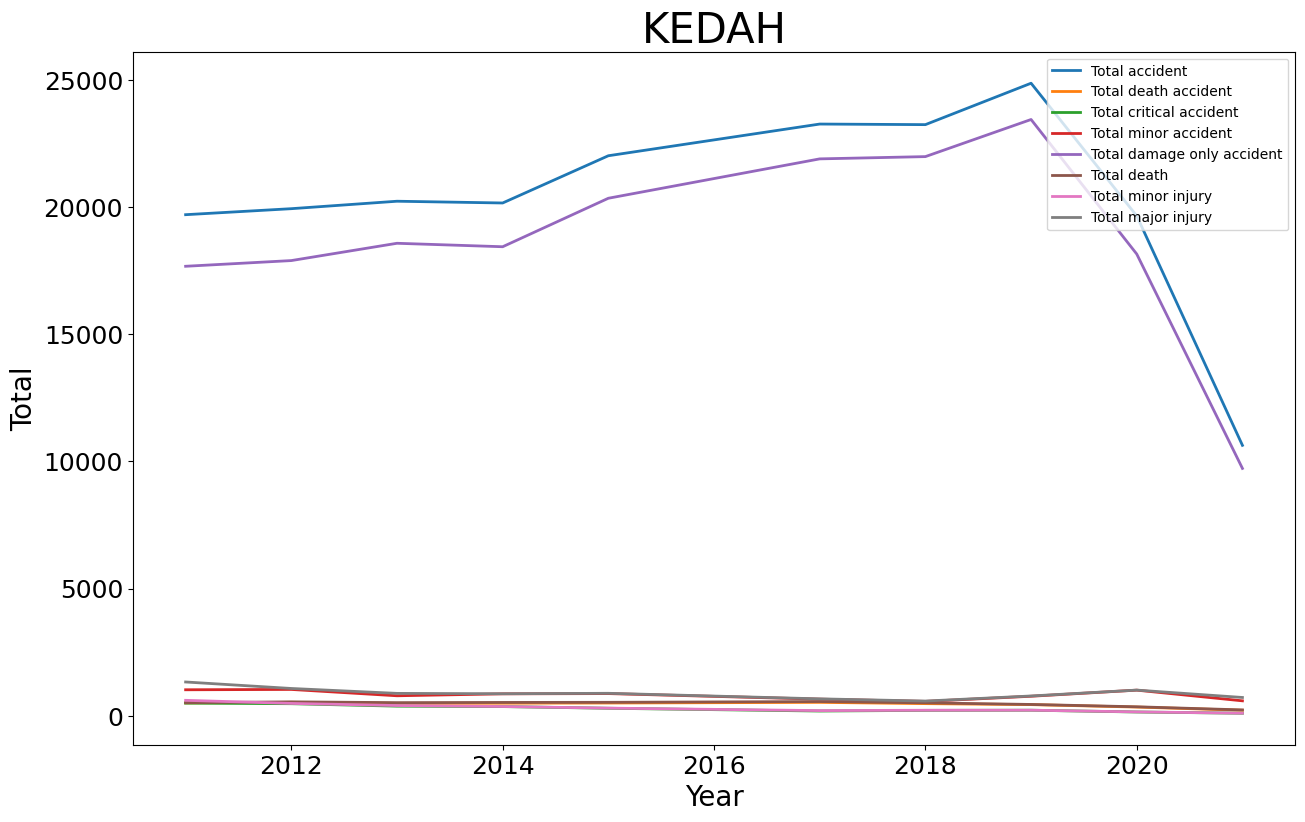

In [ ]:
import matplotlib.pyplot as plt

# setting the graph size globally
#plt.rcParams['figure.figsize'] = (15, 9)

# No need of this statement for each graph: plt.figure(figsize=[15, 9])

for col in kedah_df.columns:
    plt.plot(kedah_df[col], linewidth=2, label=col)

plt.title('KEDAH', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()


In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
perlis = accident_df[accident_df["State"] == "PERLIS"]

perlis

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
0,2011,PERLIS,1791,73,231,246,1241,79,259,288
14,2012,PERLIS,1881,69,286,233,1293,71,323,277
28,2013,PERLIS,1895,68,226,233,1368,72,248,278
42,2014,PERLIS,1888,58,220,268,1342,61,245,316
56,2015,PERLIS,1861,63,166,278,1354,65,193,340
70,2017,PERLIS,1925,60,104,234,1527,62,115,256
84,2018,PERLIS,2093,61,37,223,1772,64,48,241
98,2019,PERLIS,2098,74,17,188,1819,76,18,198
112,2020,PERLIS,1615,43,9,190,1373,46,9,190
126,2021,PERLIS,905,20,9,82,794,20,10,86


In [ ]:
# Sorting data in ascending order by the date
perlis = perlis.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
perlis.set_index('Year', inplace=True)

perlis

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,PERLIS,1791,73,231,246,1241,79,259,288
2012,PERLIS,1881,69,286,233,1293,71,323,277
2013,PERLIS,1895,68,226,233,1368,72,248,278
2014,PERLIS,1888,58,220,268,1342,61,245,316
2015,PERLIS,1861,63,166,278,1354,65,193,340
2017,PERLIS,1925,60,104,234,1527,62,115,256
2018,PERLIS,2093,61,37,223,1772,64,48,241
2019,PERLIS,2098,74,17,188,1819,76,18,198
2020,PERLIS,1615,43,9,190,1373,46,9,190


In [ ]:
# drop column state
perlis_df = perlis.drop(['State'],axis=1)

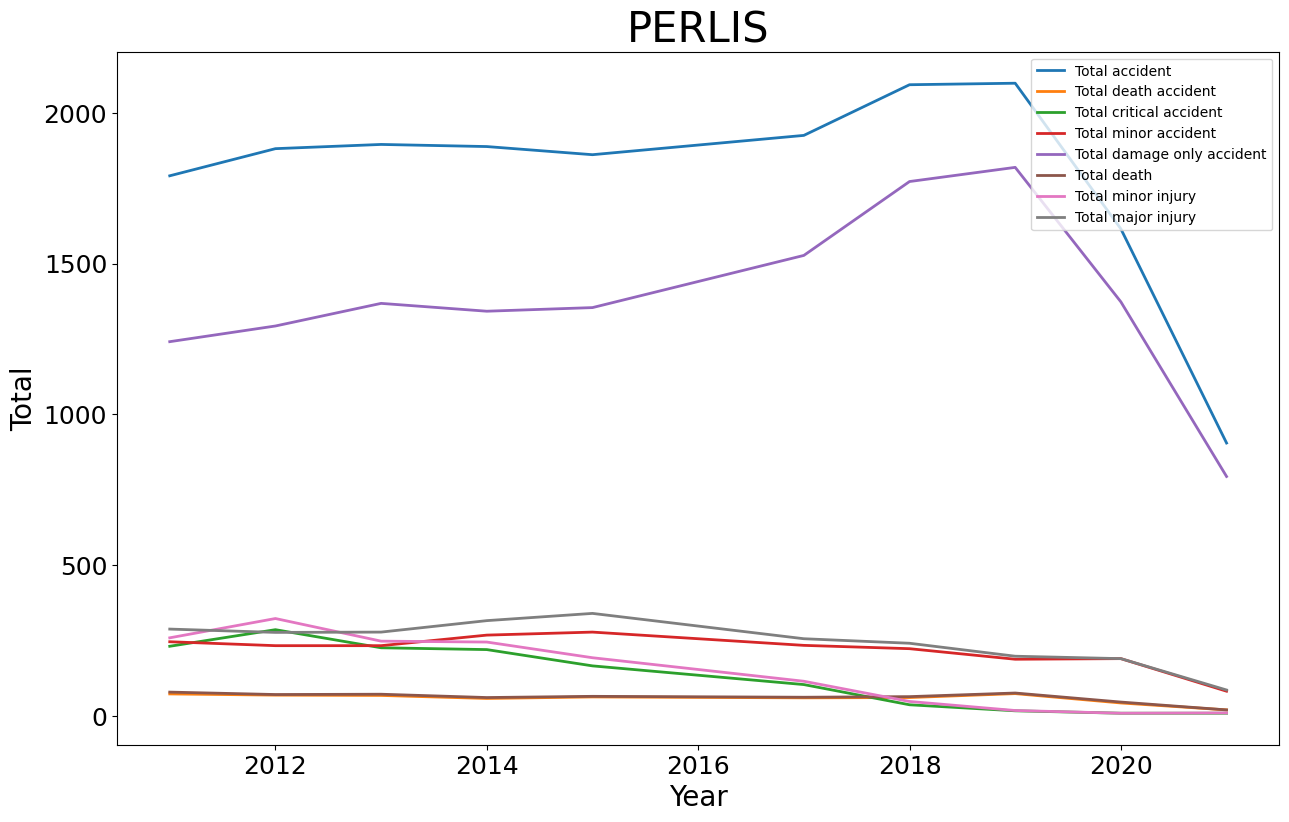

In [ ]:
for col in perlis_df.columns:
    plt.plot(perlis_df[col], linewidth=2, label=col)

plt.title('PERLIS', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
pulau = accident_df[accident_df["State"] == "PULAU PINANG"]

pulau

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
2,2011,PULAU PINANG,37158,375,160,320,36303,392,197,380
16,2012,PULAU PINANG,37851,373,129,176,37173,400,157,244
30,2013,PULAU PINANG,39361,371,132,76,38782,381,147,94
44,2014,PULAU PINANG,38747,355,154,167,38071,378,178,194
58,2015,PULAU PINANG,39856,354,164,124,39214,360,186,160
73,2017,PULAU PINANG,43007,382,158,97,42370,401,182,130
87,2018,PULAU PINANG,45734,381,115,61,45177,390,136,85
101,2019,PULAU PINANG,47198,370,104,37,46687,392,110,42
115,2020,PULAU PINANG,35234,278,86,156,34714,287,87,157
129,2021,PULAU PINANG,18166,239,51,243,17686,189,53,250


In [ ]:
# Sorting data in ascending order by the date
pulau = pulau.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
pulau.set_index('Year', inplace=True)

pulau

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,PULAU PINANG,37158,375,160,320,36303,392,197,380
2012,PULAU PINANG,37851,373,129,176,37173,400,157,244
2013,PULAU PINANG,39361,371,132,76,38782,381,147,94
2014,PULAU PINANG,38747,355,154,167,38071,378,178,194
2015,PULAU PINANG,39856,354,164,124,39214,360,186,160
2017,PULAU PINANG,43007,382,158,97,42370,401,182,130
2018,PULAU PINANG,45734,381,115,61,45177,390,136,85
2019,PULAU PINANG,47198,370,104,37,46687,392,110,42
2020,PULAU PINANG,35234,278,86,156,34714,287,87,157


In [ ]:
# drop column state
pulau_df = pulau.drop(['State'],axis=1)

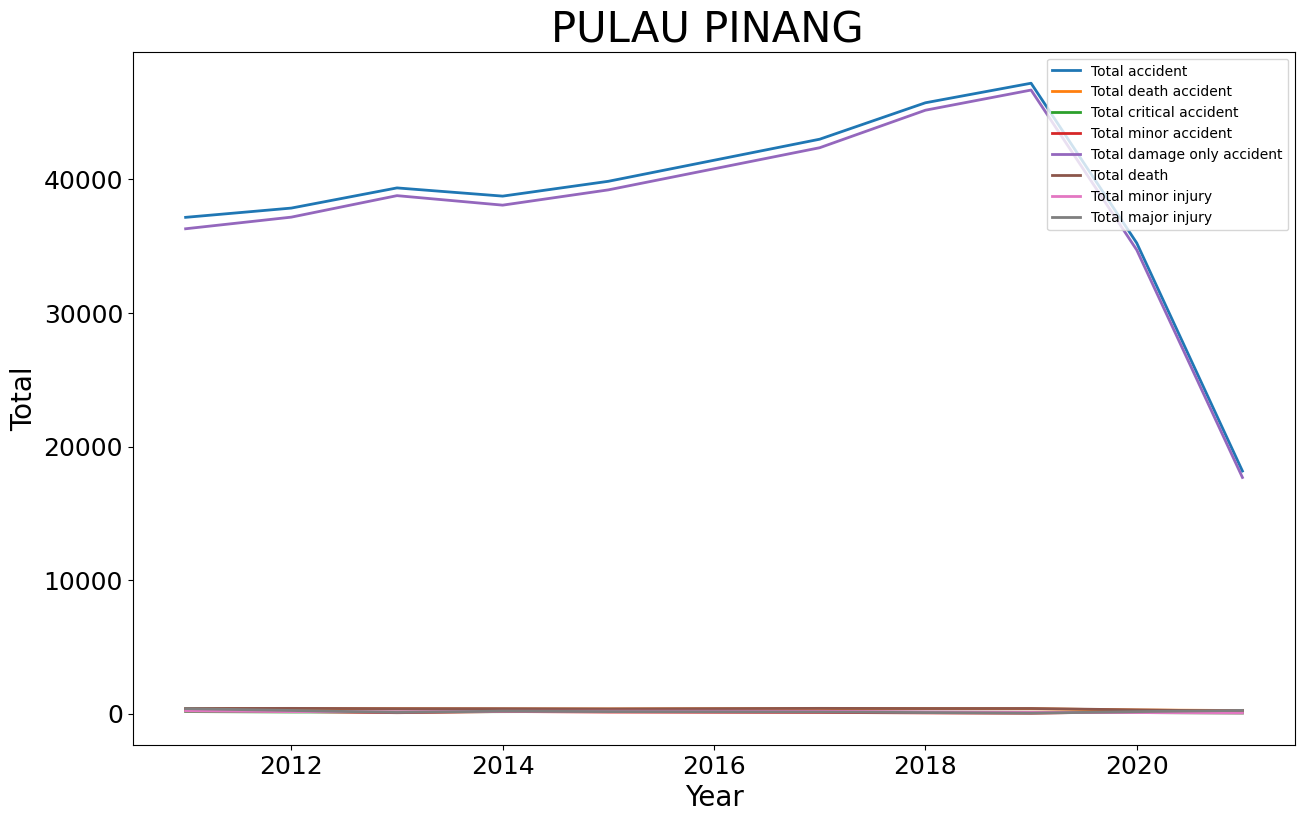

In [ ]:
for col in pulau_df.columns:
    plt.plot(pulau_df[col], linewidth=2, label=col)

plt.title('PULAU PINANG ', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
perak = accident_df[accident_df["State"] == "PERAK"]

perak

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
3,2011,PERAK,33506,739,700,1267,30800,811,898,1631
17,2012,PERAK,34714,693,564,1072,32385,753,735,1583
31,2013,PERAK,35408,707,439,795,33467,770,576,1006
45,2014,PERAK,35131,685,438,688,33320,750,580,928
59,2015,PERAK,36736,670,595,605,34866,726,740,965
72,2017,PERAK,38587,658,299,268,37362,711,449,569
86,2018,PERAK,38278,633,294,332,37019,693,435,571
100,2019,PERAK,39720,616,354,347,38403,667,465,595
114,2020,PERAK,30669,430,360,1497,28382,491,387,1516
128,2021,PERAK,15590,290,107,901,14292,331,150,1031


In [ ]:
# Sorting data in ascending order by the date
perak = perak.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
perak.set_index('Year', inplace=True)

perak

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,PERAK,33506,739,700,1267,30800,811,898,1631
2012,PERAK,34714,693,564,1072,32385,753,735,1583
2013,PERAK,35408,707,439,795,33467,770,576,1006
2014,PERAK,35131,685,438,688,33320,750,580,928
2015,PERAK,36736,670,595,605,34866,726,740,965
2017,PERAK,38587,658,299,268,37362,711,449,569
2018,PERAK,38278,633,294,332,37019,693,435,571
2019,PERAK,39720,616,354,347,38403,667,465,595
2020,PERAK,30669,430,360,1497,28382,491,387,1516


In [ ]:
# drop column state
perak_df = perak.drop(['State'],axis=1)

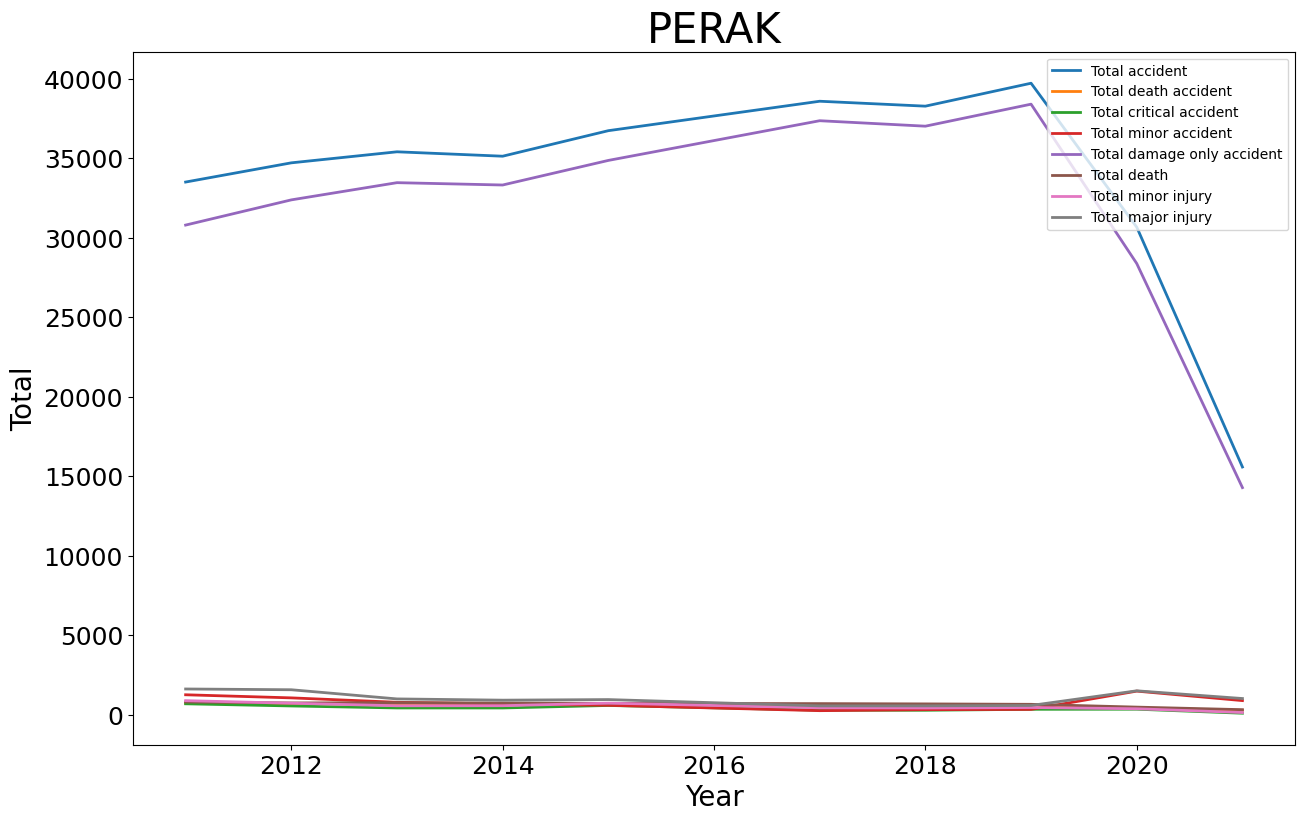

In [ ]:
for col in perak_df.columns:
    plt.plot(perak_df[col], linewidth=2, label=col)

plt.title('PERAK', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
selangor = accident_df[accident_df["State"] == "SELANGOR"]

selangor

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
4,2011,SELANGOR,128876,1015,457,689,126715,1070,566,807
18,2012,SELANGOR,129106,1053,408,693,126952,1102,458,744
32,2013,SELANGOR,135024,964,164,356,133540,1019,217,407
46,2014,SELANGOR,137809,1027,194,301,136287,1068,232,358
60,2015,SELANGOR,140957,975,190,187,139605,1028,240,218
74,2017,SELANGOR,154958,1047,239,147,153525,1087,281,178
88,2018,SELANGOR,163078,1004,242,188,161644,1046,280,215
102,2019,SELANGOR,168222,1008,353,447,166414,1054,369,455
116,2020,SELANGOR,123230,764,411,1973,120082,805,413,1973
130,2021,SELANGOR,60370,367,308,954,58688,436,312,967


In [ ]:
# Sorting data in ascending order by the date
selangor = selangor.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
selangor.set_index('Year', inplace=True)

selangor

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,SELANGOR,128876,1015,457,689,126715,1070,566,807
2012,SELANGOR,129106,1053,408,693,126952,1102,458,744
2013,SELANGOR,135024,964,164,356,133540,1019,217,407
2014,SELANGOR,137809,1027,194,301,136287,1068,232,358
2015,SELANGOR,140957,975,190,187,139605,1028,240,218
2017,SELANGOR,154958,1047,239,147,153525,1087,281,178
2018,SELANGOR,163078,1004,242,188,161644,1046,280,215
2019,SELANGOR,168222,1008,353,447,166414,1054,369,455
2020,SELANGOR,123230,764,411,1973,120082,805,413,1973


In [ ]:
# drop column state
selangor_df = selangor.drop(['State'],axis=1)

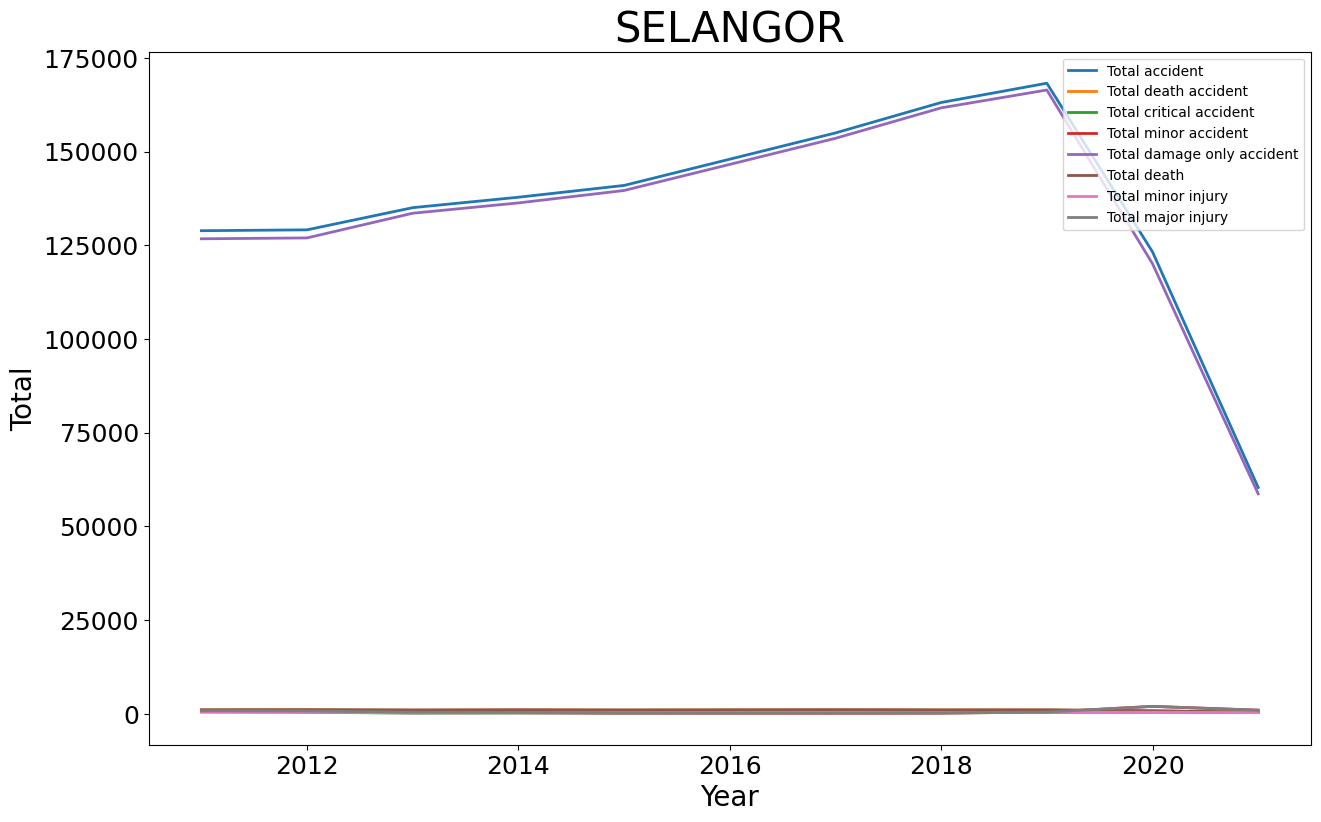

In [ ]:
for col in selangor_df.columns:
    plt.plot(selangor_df[col], linewidth=2, label=col)

plt.title('SELANGOR', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
lumpur = accident_df[accident_df["State"] == "KUALA LUMPUR"]

lumpur

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
5,2011,KUALA LUMPUR,58795,230,83,497,57985,236,83,498
19,2012,KUALA LUMPUR,61872,241,70,357,61204,249,73,365
33,2013,KUALA LUMPUR,64527,226,71,67,64163,243,75,71
47,2014,KUALA LUMPUR,63535,231,142,1166,61996,238,158,1184
61,2015,KUALA LUMPUR,64664,242,99,460,63863,256,130,502
75,2017,KUALA LUMPUR,72940,233,69,788,71850,236,81,809
89,2018,KUALA LUMPUR,72284,227,59,347,71651,229,84,368
103,2019,KUALA LUMPUR,73771,209,50,294,73218,209,51,316
117,2020,KUALA LUMPUR,50215,161,37,216,49801,163,37,219
131,2021,KUALA LUMPUR,22037,98,24,128,21787,101,27,142


In [ ]:
# Sorting data in ascending order by the date
lumpur = lumpur.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
lumpur.set_index('Year', inplace=True)

lumpur

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,KUALA LUMPUR,58795,230,83,497,57985,236,83,498
2012,KUALA LUMPUR,61872,241,70,357,61204,249,73,365
2013,KUALA LUMPUR,64527,226,71,67,64163,243,75,71
2014,KUALA LUMPUR,63535,231,142,1166,61996,238,158,1184
2015,KUALA LUMPUR,64664,242,99,460,63863,256,130,502
2017,KUALA LUMPUR,72940,233,69,788,71850,236,81,809
2018,KUALA LUMPUR,72284,227,59,347,71651,229,84,368
2019,KUALA LUMPUR,73771,209,50,294,73218,209,51,316
2020,KUALA LUMPUR,50215,161,37,216,49801,163,37,219


In [ ]:
# drop column state
lumpur_df = lumpur.drop(['State'],axis=1)

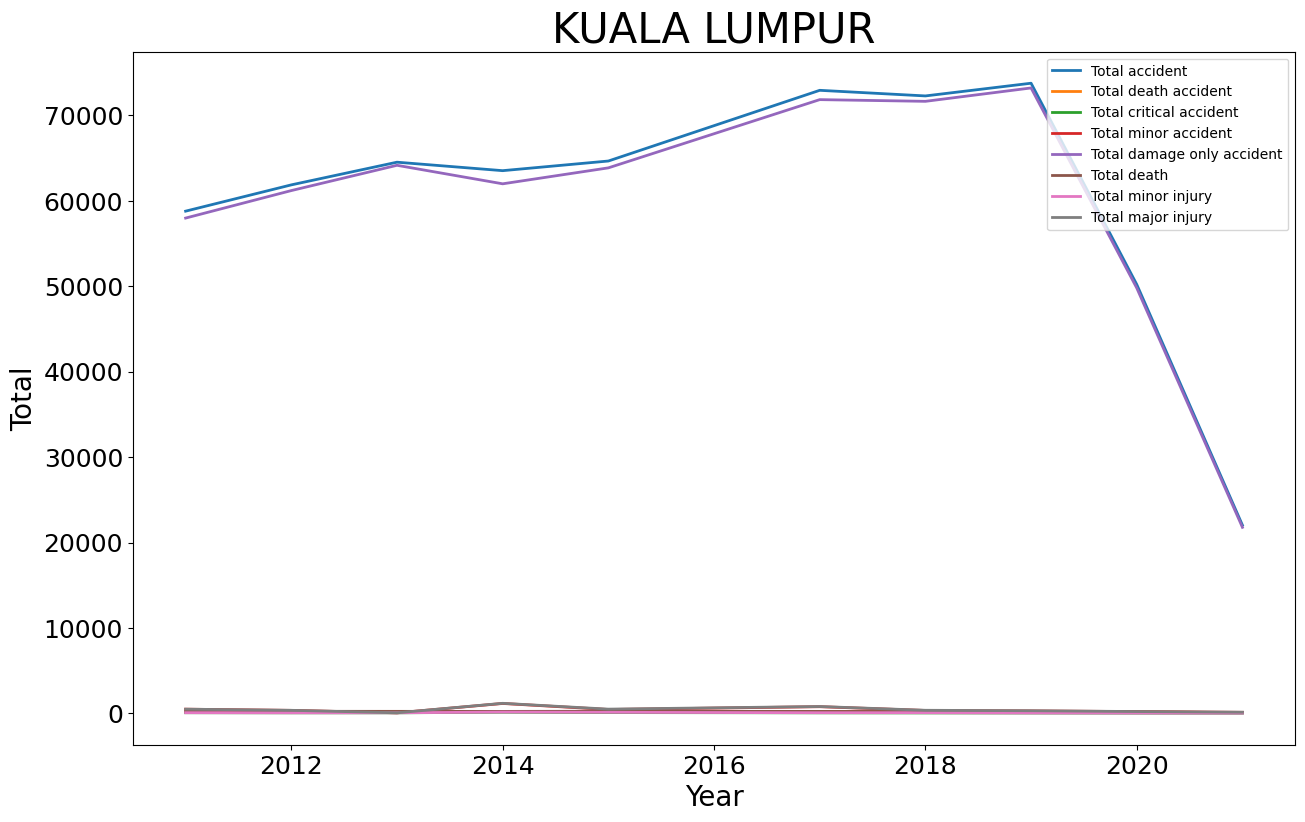

In [ ]:
for col in lumpur_df.columns:
    plt.plot(lumpur_df[col], linewidth=2, label=col)

plt.title('KUALA LUMPUR', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
negeri = accident_df[accident_df["State"] == "NEGERI SEMBILAN"]

negeri

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
6,2011,NEGERI SEMBILAN,21157,343,444,945,19425,374,568,1221
20,2012,NEGERI SEMBILAN,22146,328,479,871,20468,352,595,1020
34,2013,NEGERI SEMBILAN,23066,352,383,759,21572,396,502,984
48,2014,NEGERI SEMBILAN,23748,346,329,689,22384,379,430,890
62,2015,NEGERI SEMBILAN,22939,334,337,690,21578,355,439,916
76,2017,NEGERI SEMBILAN,24941,332,225,579,23805,370,286,703
90,2018,NEGERI SEMBILAN,25123,341,180,455,24147,362,223,573
104,2019,NEGERI SEMBILAN,25838,313,283,569,24673,337,325,651
118,2020,NEGERI SEMBILAN,19905,219,455,1055,18176,235,479,1086
132,2021,NEGERI SEMBILAN,9611,133,193,436,8849,154,220,506


In [ ]:
# Sorting data in ascending order by the date
negeri = negeri.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
negeri.set_index('Year', inplace=True)

negeri

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,NEGERI SEMBILAN,21157,343,444,945,19425,374,568,1221
2012,NEGERI SEMBILAN,22146,328,479,871,20468,352,595,1020
2013,NEGERI SEMBILAN,23066,352,383,759,21572,396,502,984
2014,NEGERI SEMBILAN,23748,346,329,689,22384,379,430,890
2015,NEGERI SEMBILAN,22939,334,337,690,21578,355,439,916
2017,NEGERI SEMBILAN,24941,332,225,579,23805,370,286,703
2018,NEGERI SEMBILAN,25123,341,180,455,24147,362,223,573
2019,NEGERI SEMBILAN,25838,313,283,569,24673,337,325,651
2020,NEGERI SEMBILAN,19905,219,455,1055,18176,235,479,1086


In [ ]:
# drop column state
negeri_df = negeri.drop(['State'],axis=1)

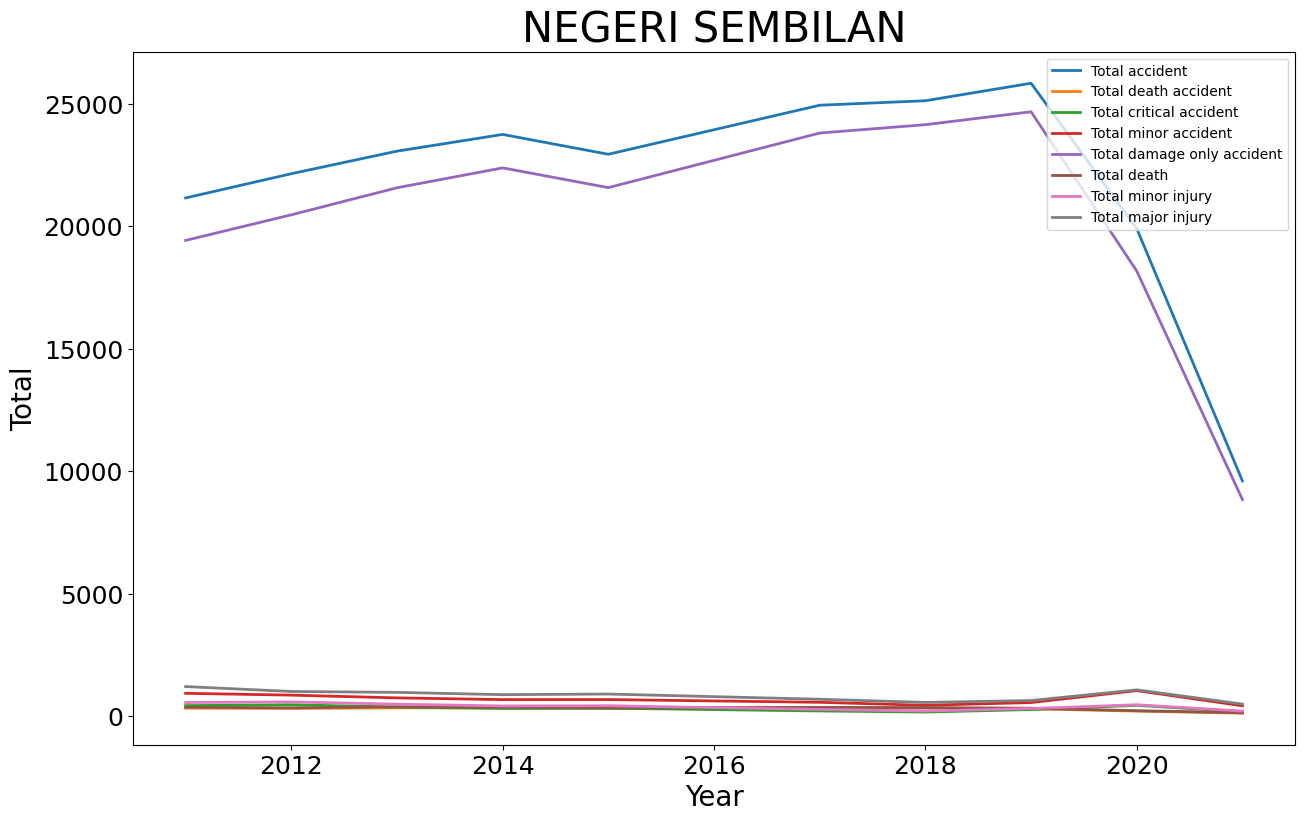

In [ ]:
for col in negeri_df.columns:
    plt.plot(negeri_df[col], linewidth=2, label=col)

plt.title('NEGERI SEMBILAN', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
melaka = accident_df[accident_df["State"] == "MELAKA"]

melaka

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
7,2011,MELAKA,14720,224,147,382,13967,240,195,509
21,2012,MELAKA,15195,222,169,406,14398,243,203,474
35,2013,MELAKA,16083,244,109,202,15528,258,145,260
49,2014,MELAKA,16375,222,187,131,15835,236,226,196
63,2015,MELAKA,17069,227,136,63,16643,256,165,102
77,2017,MELAKA,18771,217,67,34,18453,230,89,55
91,2018,MELAKA,19120,185,90,42,18803,191,110,56
105,2019,MELAKA,19593,202,68,84,19239,217,82,107
119,2020,MELAKA,14543,142,110,108,14183,151,119,116
133,2021,MELAKA,7130,72,72,103,6883,75,74,112


In [ ]:
# Sorting data in ascending order by the date
melaka = melaka.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
melaka.set_index('Year', inplace=True)

melaka

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,MELAKA,14720,224,147,382,13967,240,195,509
2012,MELAKA,15195,222,169,406,14398,243,203,474
2013,MELAKA,16083,244,109,202,15528,258,145,260
2014,MELAKA,16375,222,187,131,15835,236,226,196
2015,MELAKA,17069,227,136,63,16643,256,165,102
2017,MELAKA,18771,217,67,34,18453,230,89,55
2018,MELAKA,19120,185,90,42,18803,191,110,56
2019,MELAKA,19593,202,68,84,19239,217,82,107
2020,MELAKA,14543,142,110,108,14183,151,119,116


In [ ]:
# drop column state
melaka_df = melaka.drop(['State'],axis=1)

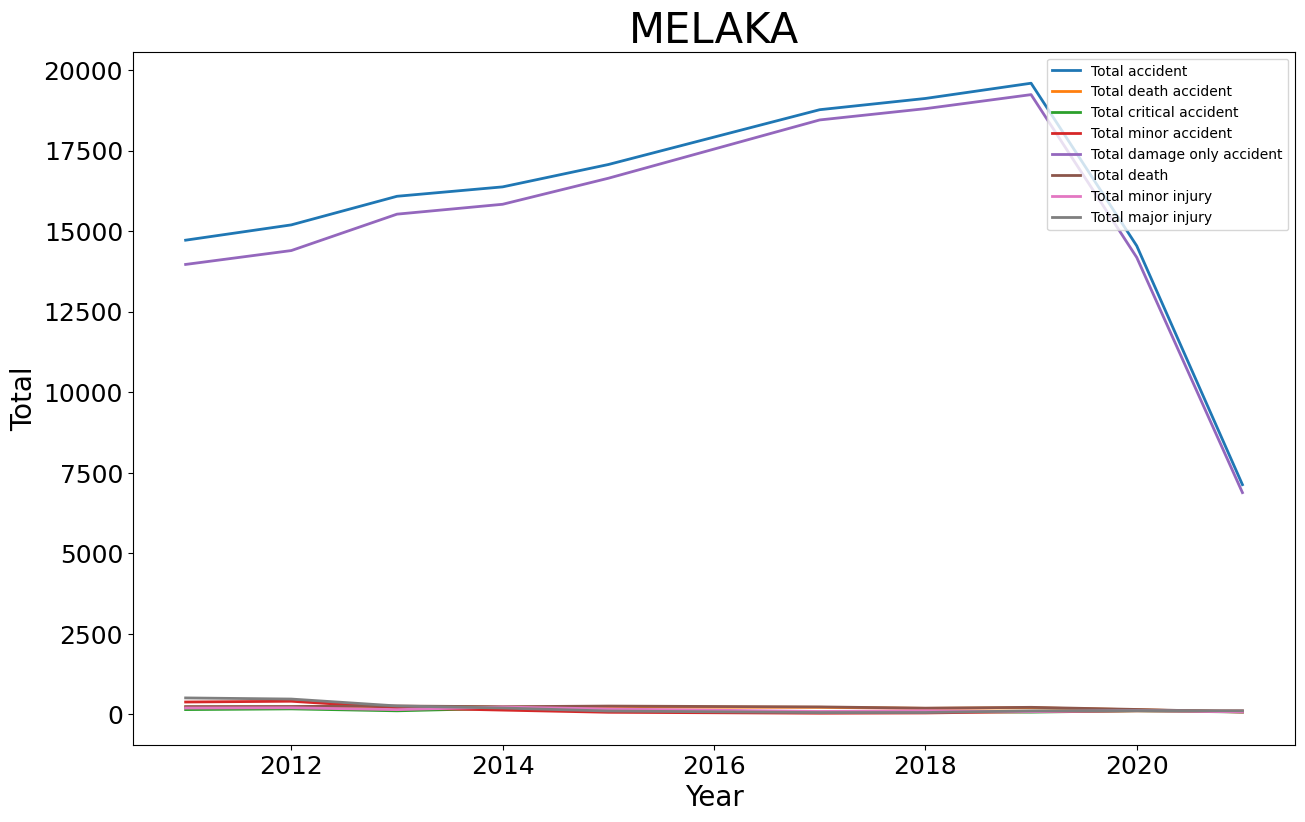

In [ ]:
for col in melaka_df.columns:
    plt.plot(melaka_df[col], linewidth=2, label=col)

plt.title('MELAKA', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
johor = accident_df[accident_df["State"] == "JOHOR"]

johor

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
8,2011,JOHOR,59501,1001,366,1007,57127,1073,492,1254
22,2012,JOHOR,62316,985,378,1263,59690,1073,454,1388
36,2013,JOHOR,64600,1032,271,1055,62242,1128,356,1233
50,2014,JOHOR,64473,946,193,687,62647,1018,281,759
64,2015,JOHOR,67112,955,136,384,65637,1040,216,466
78,2017,JOHOR,76121,986,182,268,74685,1067,287,476
92,2018,JOHOR,78812,898,173,196,77545,977,242,332
106,2019,JOHOR,82502,966,189,209,81138,1040,264,305
120,2020,JOHOR,58207,638,319,698,56552,697,335,703
134,2021,JOHOR,28157,358,159,321,27319,372,179,334


In [ ]:
# Sorting data in ascending order by the date
johor = johor.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
johor.set_index('Year', inplace=True)

johor

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,JOHOR,59501,1001,366,1007,57127,1073,492,1254
2012,JOHOR,62316,985,378,1263,59690,1073,454,1388
2013,JOHOR,64600,1032,271,1055,62242,1128,356,1233
2014,JOHOR,64473,946,193,687,62647,1018,281,759
2015,JOHOR,67112,955,136,384,65637,1040,216,466
2017,JOHOR,76121,986,182,268,74685,1067,287,476
2018,JOHOR,78812,898,173,196,77545,977,242,332
2019,JOHOR,82502,966,189,209,81138,1040,264,305
2020,JOHOR,58207,638,319,698,56552,697,335,703


In [ ]:
# drop column state
johor_df = johor.drop(['State'],axis=1)

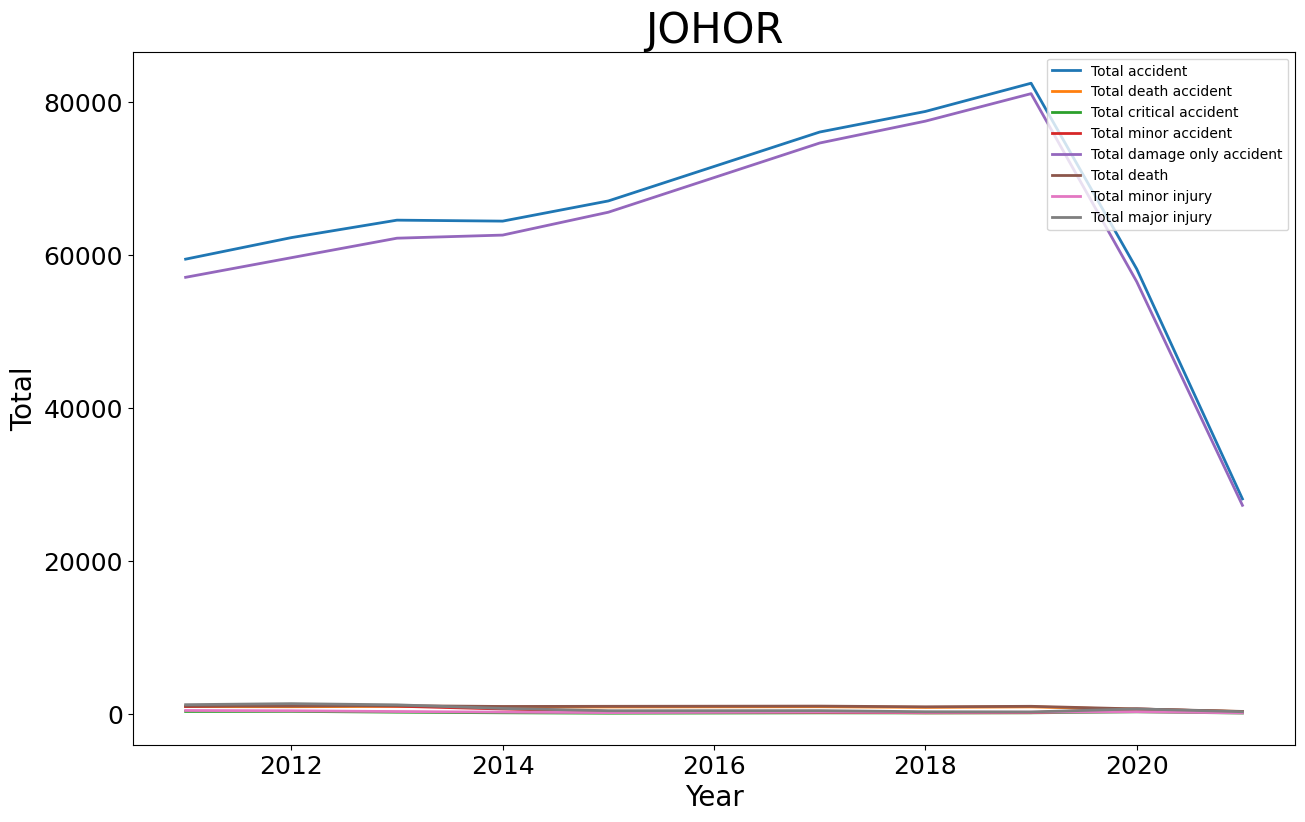

In [ ]:
for col in johor_df.columns:
    plt.plot(johor_df[col], linewidth=2, label=col)

plt.title('JOHOR', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
pahang = accident_df[accident_df["State"] == "PAHANG"]

pahang

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
9,2011,PAHANG,19001,485,255,403,17858,563,447,661
23,2012,PAHANG,20554,484,238,373,19459,540,369,592
37,2013,PAHANG,20130,505,175,356,19094,592,299,541
51,2014,PAHANG,19071,472,165,313,18121,539,270,458
65,2015,PAHANG,19635,477,142,301,18715,532,237,456
79,2017,PAHANG,20813,446,115,99,20153,485,197,226
93,2018,PAHANG,20641,425,93,79,20044,485,167,163
107,2019,PAHANG,21196,398,141,158,20499,454,181,232
121,2020,PAHANG,17000,313,124,315,16248,356,127,322
135,2021,PAHANG,8071,161,109,501,7300,176,129,189


In [ ]:
# Sorting data in ascending order by the date
pahang = pahang.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
pahang.set_index('Year', inplace=True)

pahang

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,PAHANG,19001,485,255,403,17858,563,447,661
2012,PAHANG,20554,484,238,373,19459,540,369,592
2013,PAHANG,20130,505,175,356,19094,592,299,541
2014,PAHANG,19071,472,165,313,18121,539,270,458
2015,PAHANG,19635,477,142,301,18715,532,237,456
2017,PAHANG,20813,446,115,99,20153,485,197,226
2018,PAHANG,20641,425,93,79,20044,485,167,163
2019,PAHANG,21196,398,141,158,20499,454,181,232
2020,PAHANG,17000,313,124,315,16248,356,127,322


In [ ]:
# drop column state
pahang_df = pahang.drop(['State'],axis=1)

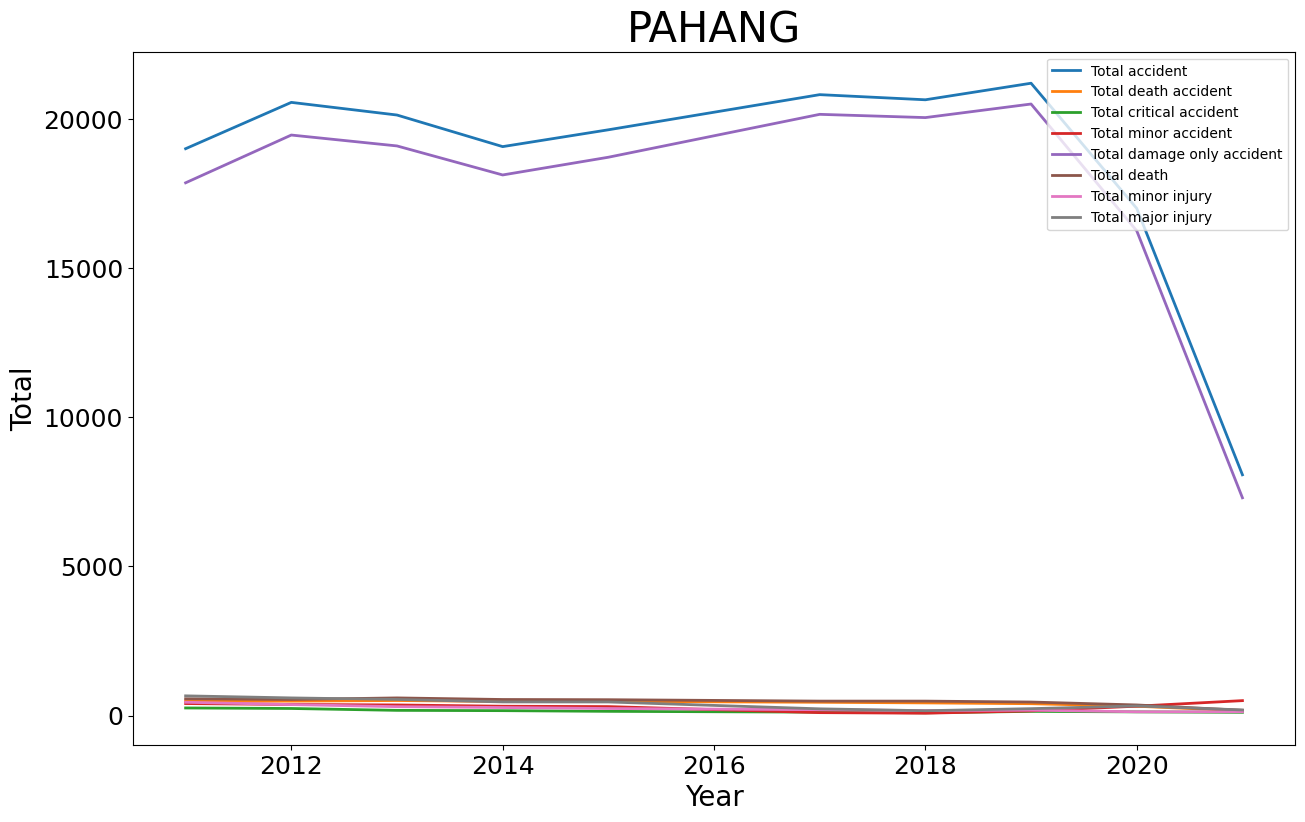

In [ ]:
for col in pahang_df.columns:
    plt.plot(pahang_df[col], linewidth=2, label=col)

plt.title('PAHANG', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
kelantan = accident_df[accident_df["State"] == "KELANTAN"]

kelantan

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
10,2011,KELANTAN,9603,343,620,1437,7203,392,800,1819
24,2012,KELANTAN,9968,347,500,1560,7561,392,647,1839
38,2013,KELANTAN,9748,340,396,917,8095,378,524,1167
52,2014,KELANTAN,9383,321,274,807,7981,354,346,977
66,2015,KELANTAN,9960,379,220,841,8520,426,308,1059
80,2017,KELANTAN,10786,389,194,1002,9201,442,251,1277
94,2018,KELANTAN,10983,380,185,1208,9210,420,240,1386
108,2019,KELANTAN,11295,310,172,1220,9593,338,193,1282
122,2020,KELANTAN,9752,265,233,1659,7595,276,233,1659
136,2021,KELANTAN,4403,130,91,794,3388,133,102,803


In [ ]:
# Sorting data in ascending order by the date
kelantan = kelantan.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
kelantan.set_index('Year', inplace=True)

kelantan

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,KELANTAN,9603,343,620,1437,7203,392,800,1819
2012,KELANTAN,9968,347,500,1560,7561,392,647,1839
2013,KELANTAN,9748,340,396,917,8095,378,524,1167
2014,KELANTAN,9383,321,274,807,7981,354,346,977
2015,KELANTAN,9960,379,220,841,8520,426,308,1059
2017,KELANTAN,10786,389,194,1002,9201,442,251,1277
2018,KELANTAN,10983,380,185,1208,9210,420,240,1386
2019,KELANTAN,11295,310,172,1220,9593,338,193,1282
2020,KELANTAN,9752,265,233,1659,7595,276,233,1659


In [ ]:
# drop column state
kelantan_df = kelantan.drop(['State'],axis=1)

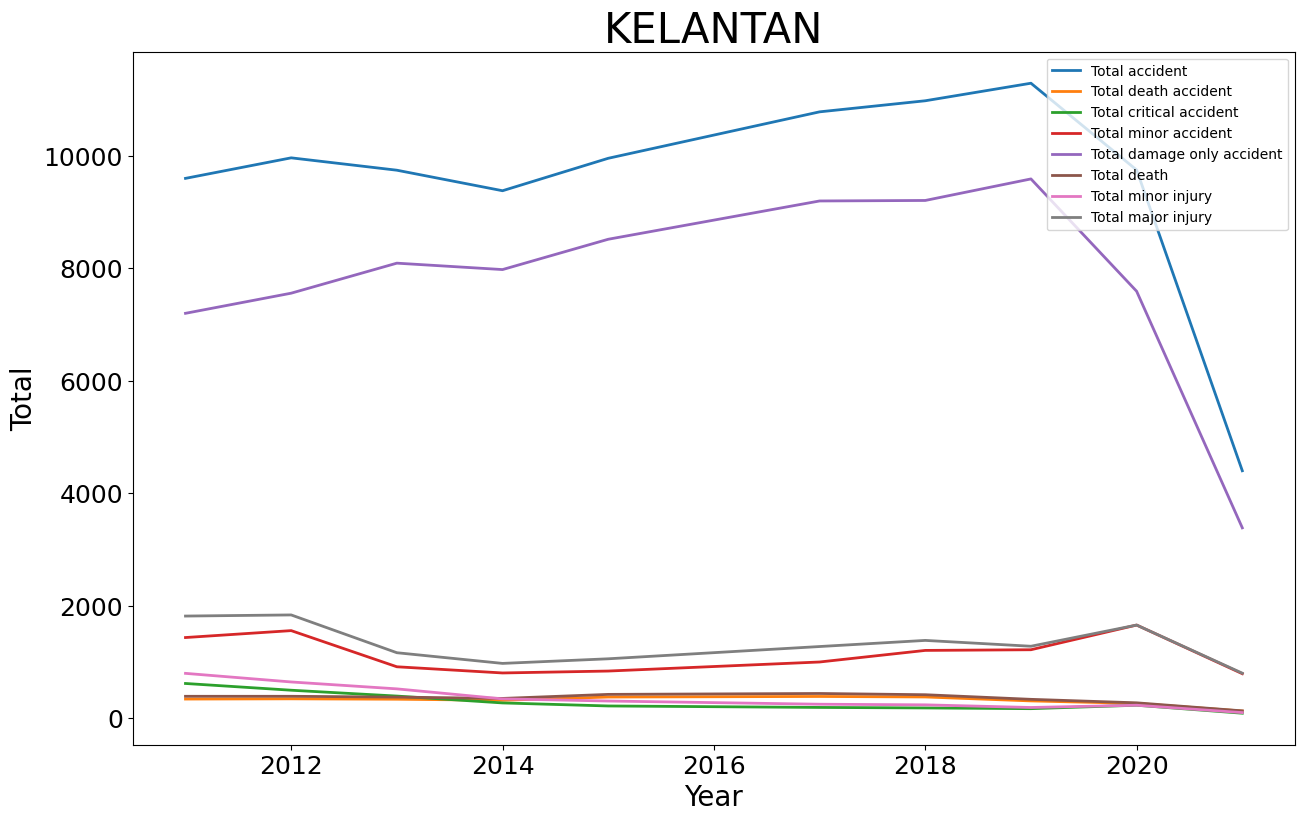

In [ ]:
for col in kelantan_df.columns:
    plt.plot(kelantan_df[col], linewidth=2, label=col)

plt.title('KELANTAN', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
terengganu = accident_df[accident_df["State"] == "TERENGGANU"]

terengganu

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
11,2011,TERENGGANU,10684,274,251,349,9810,292,317,509
25,2012,TERENGGANU,10861,270,264,413,9914,301,356,550
39,2013,TERENGGANU,10996,294,199,226,10277,320,256,323
53,2014,TERENGGANU,10326,255,194,325,9552,276,241,416
67,2015,TERENGGANU,10381,280,162,322,9617,307,225,411
81,2017,TERENGGANU,10713,299,79,201,10134,330,136,307
95,2018,TERENGGANU,10607,256,114,162,10075,275,149,236
109,2019,TERENGGANU,11355,251,151,229,10724,277,172,285
123,2020,TERENGGANU,9152,208,134,210,8600,238,167,217
137,2021,TERENGGANU,4539,93,71,87,4288,106,80,89


In [ ]:
# Sorting data in ascending order by the date
terengganu = terengganu.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
terengganu.set_index('Year', inplace=True)

terengganu

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,TERENGGANU,10684,274,251,349,9810,292,317,509
2012,TERENGGANU,10861,270,264,413,9914,301,356,550
2013,TERENGGANU,10996,294,199,226,10277,320,256,323
2014,TERENGGANU,10326,255,194,325,9552,276,241,416
2015,TERENGGANU,10381,280,162,322,9617,307,225,411
2017,TERENGGANU,10713,299,79,201,10134,330,136,307
2018,TERENGGANU,10607,256,114,162,10075,275,149,236
2019,TERENGGANU,11355,251,151,229,10724,277,172,285
2020,TERENGGANU,9152,208,134,210,8600,238,167,217


In [ ]:
# drop column state
terengganu_df = terengganu.drop(['State'],axis=1)

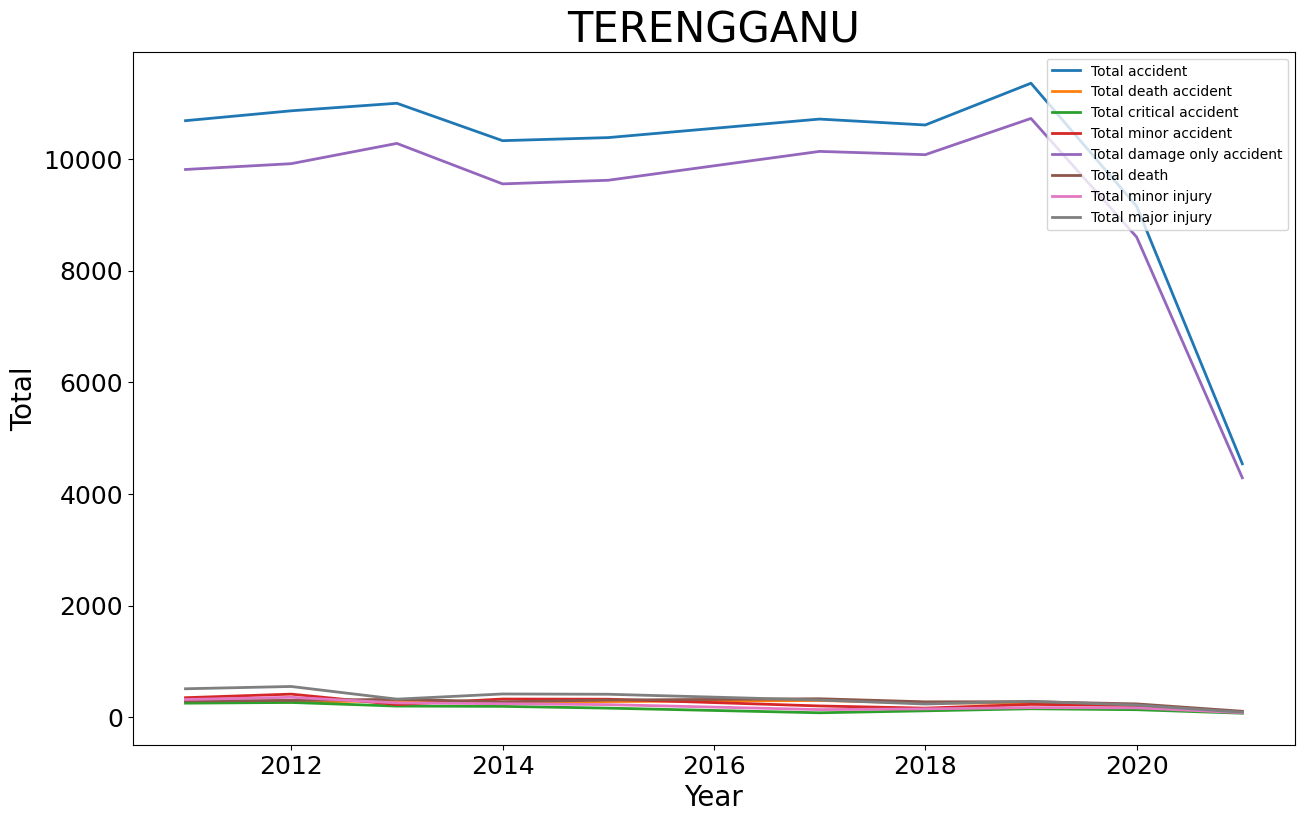

In [ ]:
for col in terengganu_df.columns:
    plt.plot(terengganu_df[col], linewidth=2, label=col)

plt.title('TERENGGANU', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
sabah = accident_df[accident_df["State"] == "SABAH"]

sabah

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
12,2011,SABAH,16585,350,428,467,15340,398,552,833
26,2012,SABAH,17446,398,516,470,16062,450,674,802
40,2013,SABAH,17438,347,456,304,16331,420,597,585
54,2014,SABAH,17693,384,443,373,16493,420,612,621
68,2015,SABAH,17290,343,369,307,16271,392,480,544
82,2017,SABAH,17244,312,335,239,16358,351,473,486
96,2018,SABAH,18006,280,243,187,17296,310,366,329
110,2019,SABAH,18520,256,284,253,17727,291,359,307
124,2020,SABAH,12906,190,146,211,12359,220,160,225
138,2021,SABAH,7159,99,90,107,6863,118,106,122


In [ ]:
# Sorting data in ascending order by the date
sabah = sabah.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
sabah.set_index('Year', inplace=True)

sabah

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,SABAH,16585,350,428,467,15340,398,552,833
2012,SABAH,17446,398,516,470,16062,450,674,802
2013,SABAH,17438,347,456,304,16331,420,597,585
2014,SABAH,17693,384,443,373,16493,420,612,621
2015,SABAH,17290,343,369,307,16271,392,480,544
2017,SABAH,17244,312,335,239,16358,351,473,486
2018,SABAH,18006,280,243,187,17296,310,366,329
2019,SABAH,18520,256,284,253,17727,291,359,307
2020,SABAH,12906,190,146,211,12359,220,160,225


In [ ]:
# drop column state
sabah_df = sabah.drop(['State'],axis=1)

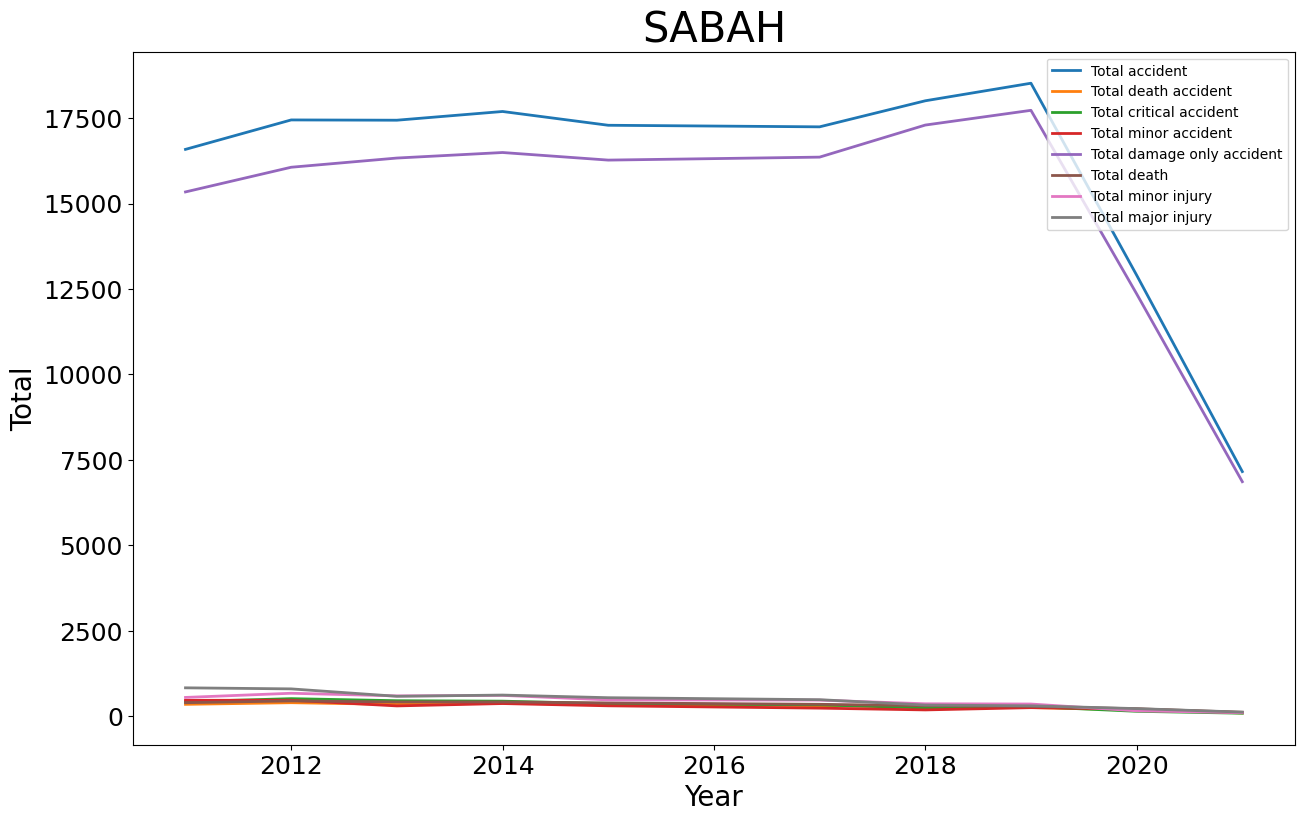

In [ ]:
for col in sabah_df.columns:
    plt.plot(sabah_df[col], linewidth=2, label=col)

plt.title('SABAH', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
accident_df["State"] = accident_df["State"].str.strip()
sarawak = accident_df[accident_df["State"] == "SARAWAK"]

sarawak

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
13,2011,SARAWAK,17964,391,234,406,16933,442,346,626
27,2012,SARAWAK,18578,389,218,475,17496,443,338,702
41,2013,SARAWAK,18700,371,167,390,17772,421,252,558
55,2014,SARAWAK,17858,390,182,321,16965,432,268,434
69,2015,SARAWAK,19130,392,198,298,18242,433,260,409
83,2017,SARAWAK,19807,376,215,309,18907,408,279,401
97,2018,SARAWAK,20600,321,204,190,19885,333,266,243
111,2019,SARAWAK,21341,352,196,248,20545,369,213,301
125,2020,SARAWAK,16158,303,134,358,15363,315,134,369
139,2021,SARAWAK,7883,143,77,185,7478,156,86,224


In [ ]:
# Sorting data in ascending order by the date
sarawak = sarawak.sort_values(by='Year')

# Now, setting the Date column as the index of the dataframe
sarawak.set_index('Year', inplace=True)

sarawak

,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
Year,,,,,,,,,
2011,SARAWAK,17964,391,234,406,16933,442,346,626
2012,SARAWAK,18578,389,218,475,17496,443,338,702
2013,SARAWAK,18700,371,167,390,17772,421,252,558
2014,SARAWAK,17858,390,182,321,16965,432,268,434
2015,SARAWAK,19130,392,198,298,18242,433,260,409
2017,SARAWAK,19807,376,215,309,18907,408,279,401
2018,SARAWAK,20600,321,204,190,19885,333,266,243
2019,SARAWAK,21341,352,196,248,20545,369,213,301
2020,SARAWAK,16158,303,134,358,15363,315,134,369


In [ ]:
# drop column state
sarawak_df = sarawak.drop(['State'],axis=1)

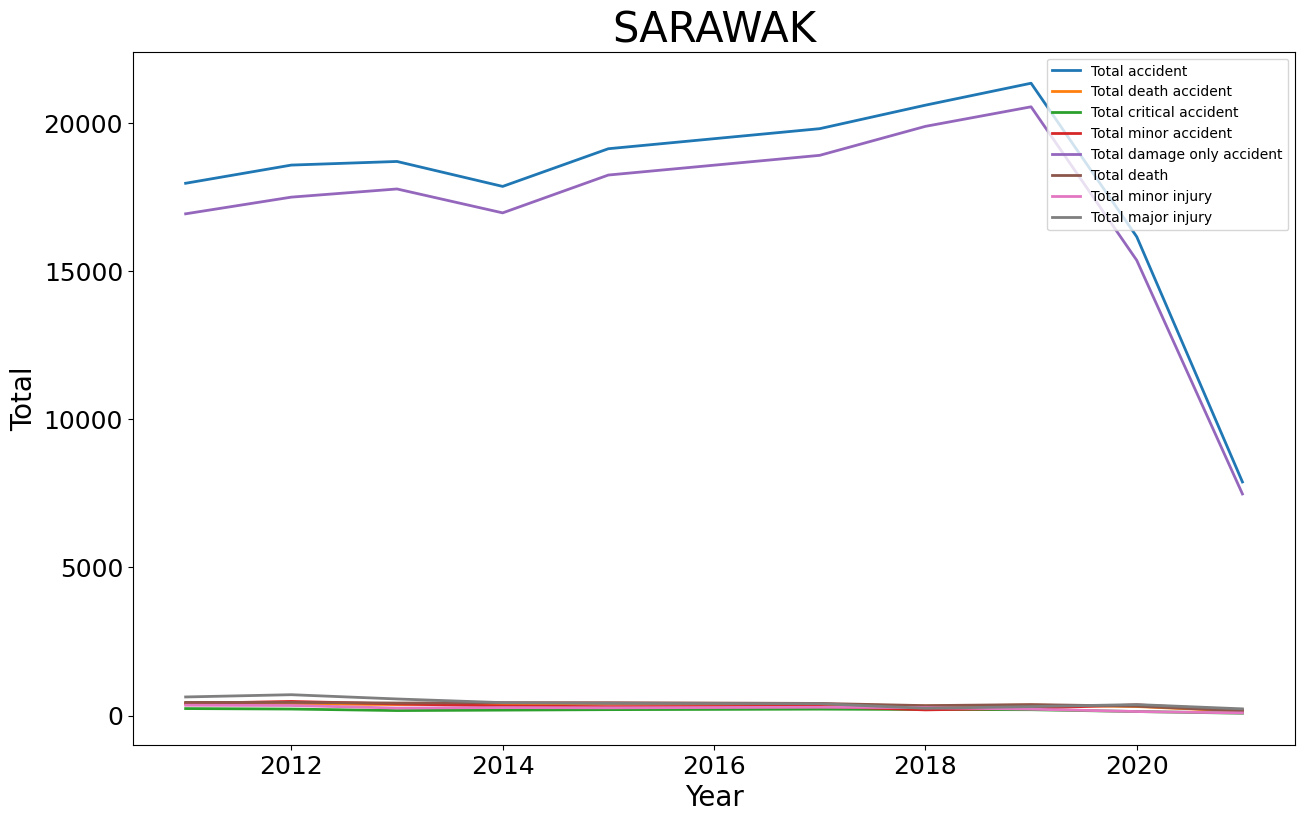

In [ ]:
for col in sarawak_df.columns:
    plt.plot(sarawak_df[col], linewidth=2, label=col)

plt.title('SARAWAK', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend( fontsize="10", loc ="upper right")

# plt.set_cmap('Paired') # You can set the colormap to the graph
plt.show()

In [ ]:
# to select column
ToAccident = accident_df[['Year','State','Total accident']]

ToAccident

,Year,State,Total accident
0,2011,PERLIS,1791
1,2011,KEDAH,19699
2,2011,PULAU PINANG,37158
3,2011,PERAK,33506
4,2011,SELANGOR,128876
...,...,...,...
135,2021,PAHANG,8071
136,2021,KELANTAN,4403
137,2021,TERENGGANU,4539
138,2021,SABAH,7159


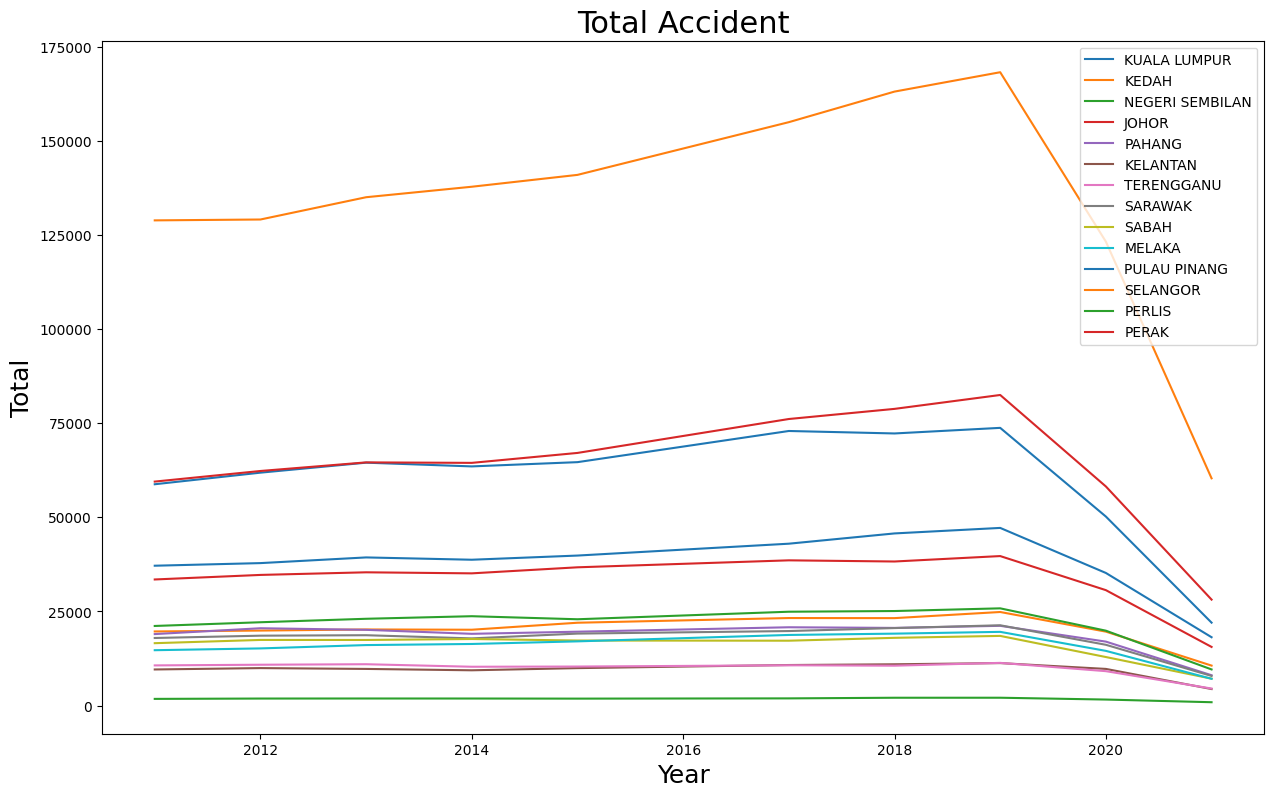

In [ ]:
# set every state for line
State_set = set(ToAccident['State'])


plt.figure()

plt.title('Total Accident', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = ToAccident.loc[ToAccident['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total accident'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()


In [ ]:
# to select column
DeathAccident = accident_df[['Year','State','Total death accident']]

DeathAccident

,Year,State,Total death accident
0,2011,PERLIS,73
1,2011,KEDAH,506
2,2011,PULAU PINANG,375
3,2011,PERAK,739
4,2011,SELANGOR,1015
...,...,...,...
135,2021,PAHANG,161
136,2021,KELANTAN,130
137,2021,TERENGGANU,93
138,2021,SABAH,99


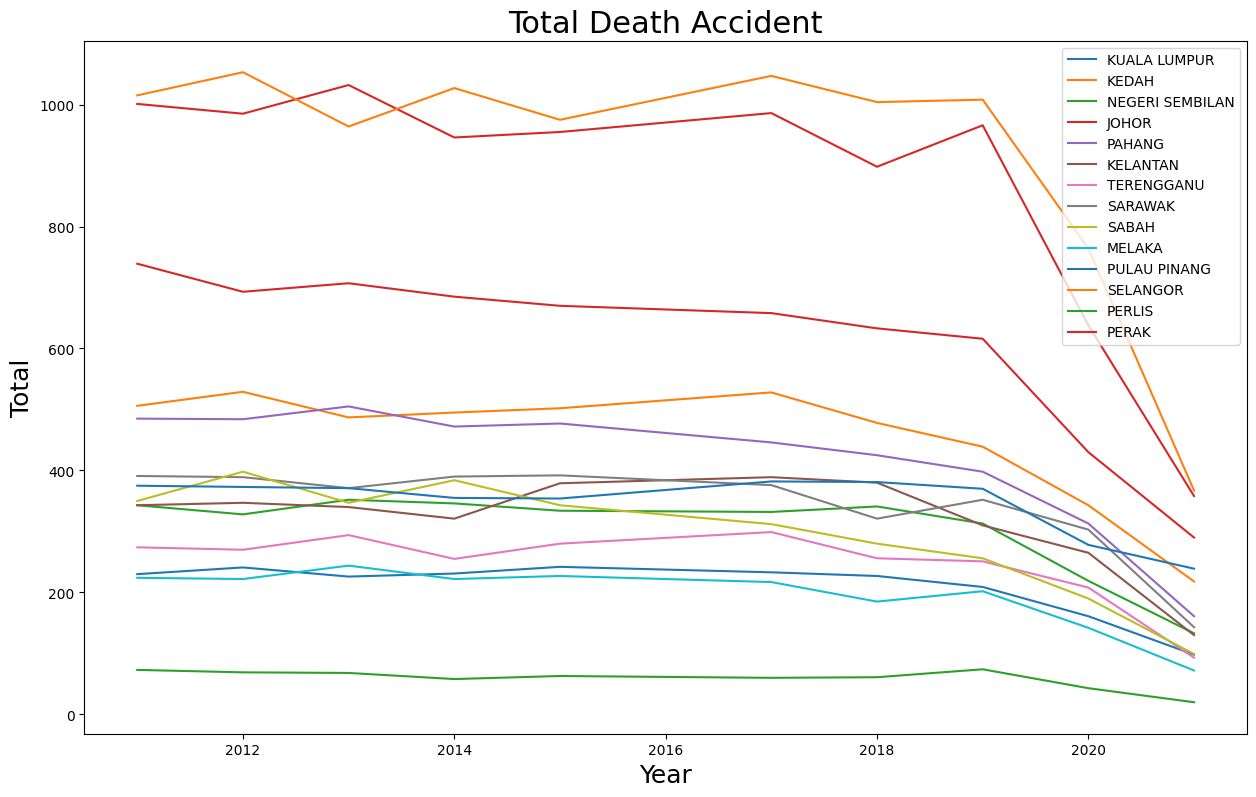

In [ ]:
# set every state for line
State_set = set(DeathAccident['State'])


plt.figure()

plt.title('Total Death Accident', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = DeathAccident.loc[DeathAccident['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total death accident'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()

In [ ]:
# to select column
CriAccident = accident_df[['Year','State','Total critical accident']]

CriAccident

,Year,State,Total critical accident
0,2011,PERLIS,231
1,2011,KEDAH,499
2,2011,PULAU PINANG,160
3,2011,PERAK,700
4,2011,SELANGOR,457
...,...,...,...
135,2021,PAHANG,109
136,2021,KELANTAN,91
137,2021,TERENGGANU,71
138,2021,SABAH,90


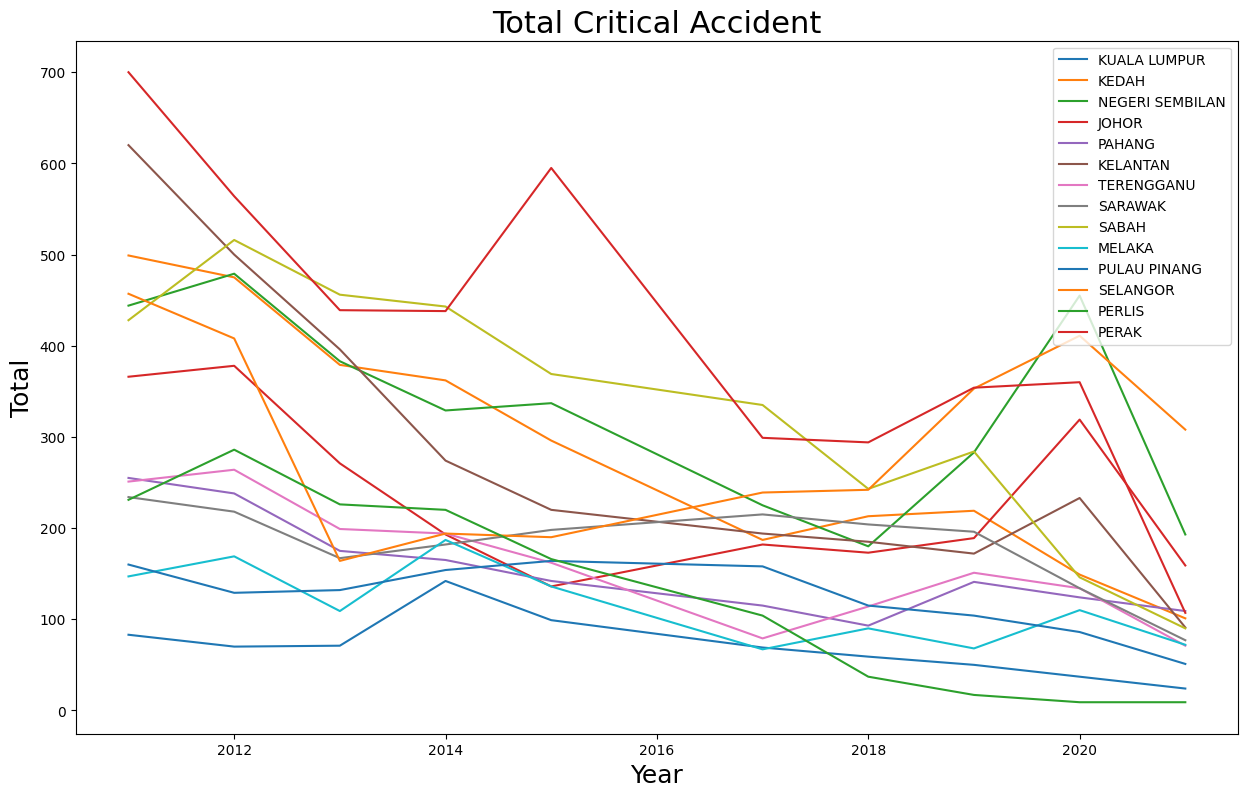

In [ ]:
# set every state for line
State_set = set(CriAccident['State'])


plt.figure()

plt.title('Total Critical Accident', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = CriAccident.loc[CriAccident['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total critical accident'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()

In [ ]:
# to select column
MinAccident = accident_df[['Year','State','Total minor accident']]

MinAccident

,Year,State,Total minor accident
0,2011,PERLIS,246
1,2011,KEDAH,1023
2,2011,PULAU PINANG,320
3,2011,PERAK,1267
4,2011,SELANGOR,689
...,...,...,...
135,2021,PAHANG,501
136,2021,KELANTAN,794
137,2021,TERENGGANU,87
138,2021,SABAH,107


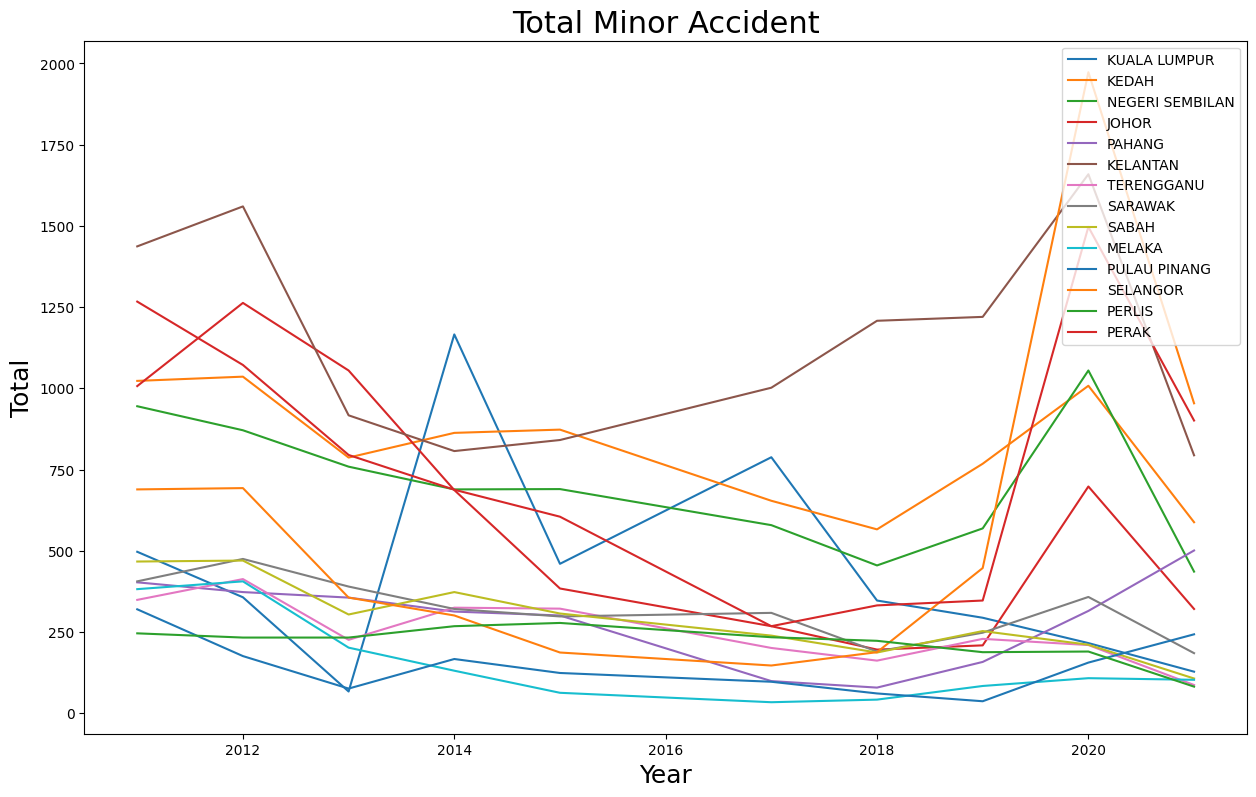

In [ ]:
# set every state for line
State_set = set(MinAccident['State'])


plt.figure()

plt.title('Total Minor Accident', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = MinAccident.loc[MinAccident['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total minor accident'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()

In [ ]:
# to select column
DamAccident = accident_df[['Year','State','Total damage only accident']]

DamAccident

,Year,State,Total damage only accident
0,2011,PERLIS,1241
1,2011,KEDAH,17671
2,2011,PULAU PINANG,36303
3,2011,PERAK,30800
4,2011,SELANGOR,126715
...,...,...,...
135,2021,PAHANG,7300
136,2021,KELANTAN,3388
137,2021,TERENGGANU,4288
138,2021,SABAH,6863


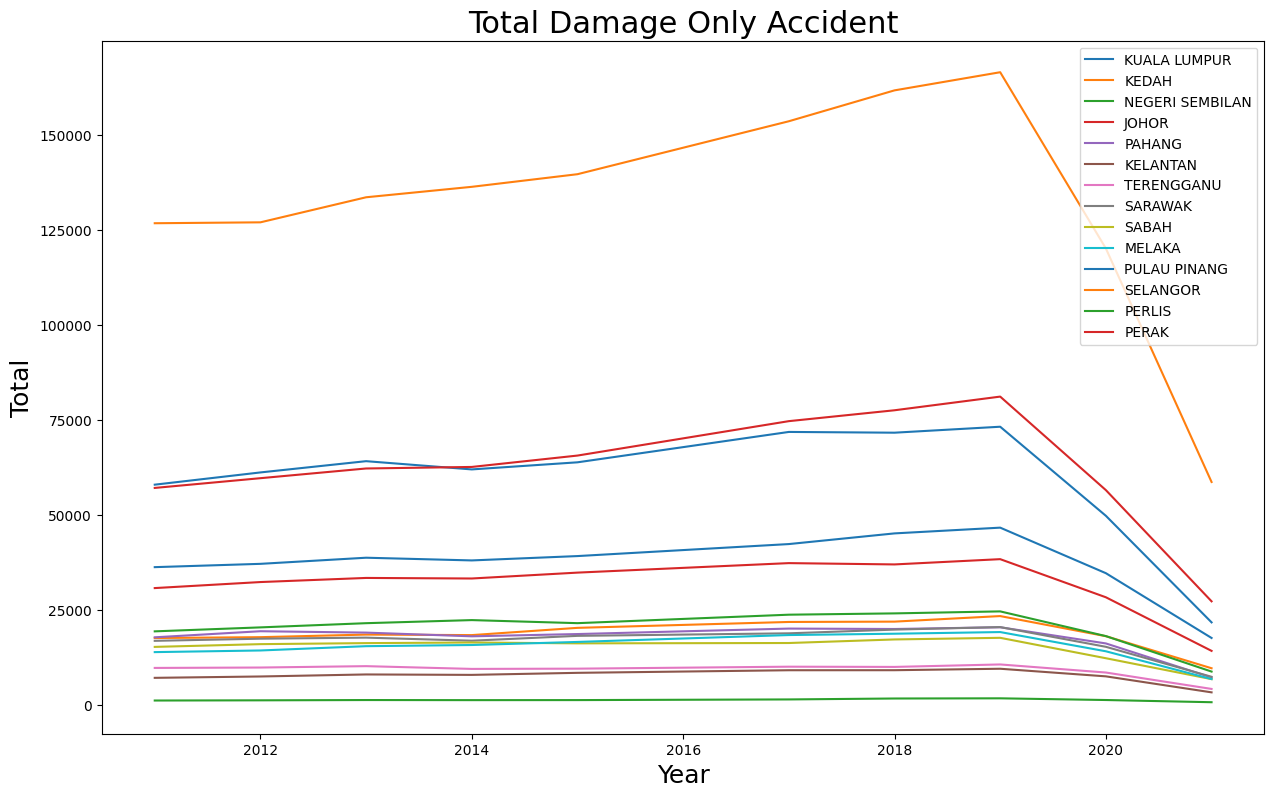

In [ ]:
# set every state for line
State_set = set(DamAccident['State'])


plt.figure()

plt.title('Total Damage Only Accident', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = DamAccident.loc[DamAccident['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total damage only accident'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()

In [ ]:
# to select column
TotalDeath = accident_df[['Year','State','Total death']]

TotalDeath

,Year,State,Total death
0,2011,PERLIS,79
1,2011,KEDAH,515
2,2011,PULAU PINANG,392
3,2011,PERAK,811
4,2011,SELANGOR,1070
...,...,...,...
135,2021,PAHANG,176
136,2021,KELANTAN,133
137,2021,TERENGGANU,106
138,2021,SABAH,118


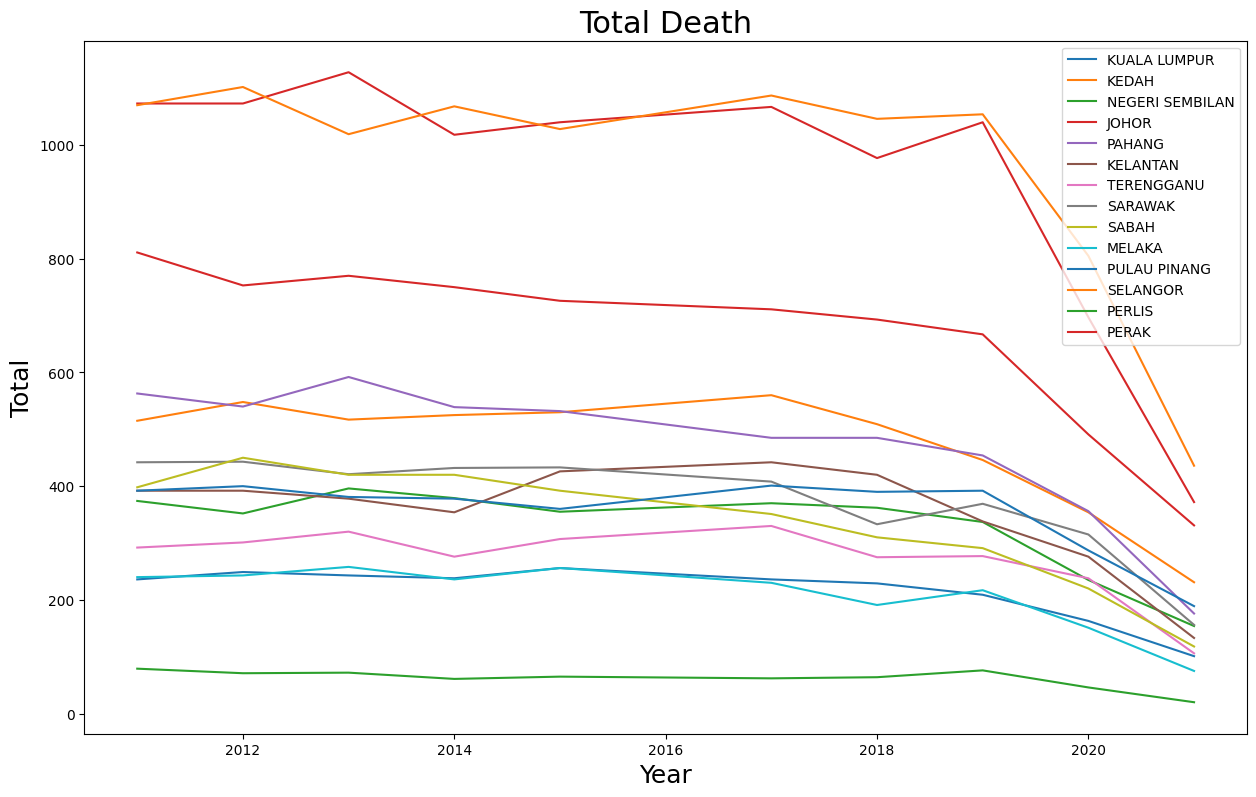

In [ ]:
# set every state for line
State_set = set(TotalDeath['State'])


plt.figure()

plt.title('Total Death', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = TotalDeath.loc[TotalDeath['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total death'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()

In [ ]:
# to select column
minInjury = accident_df[['Year','State','Total minor injury']]

minInjury

,Year,State,Total minor injury
0,2011,PERLIS,259
1,2011,KEDAH,608
2,2011,PULAU PINANG,197
3,2011,PERAK,898
4,2011,SELANGOR,566
...,...,...,...
135,2021,PAHANG,129
136,2021,KELANTAN,102
137,2021,TERENGGANU,80
138,2021,SABAH,106


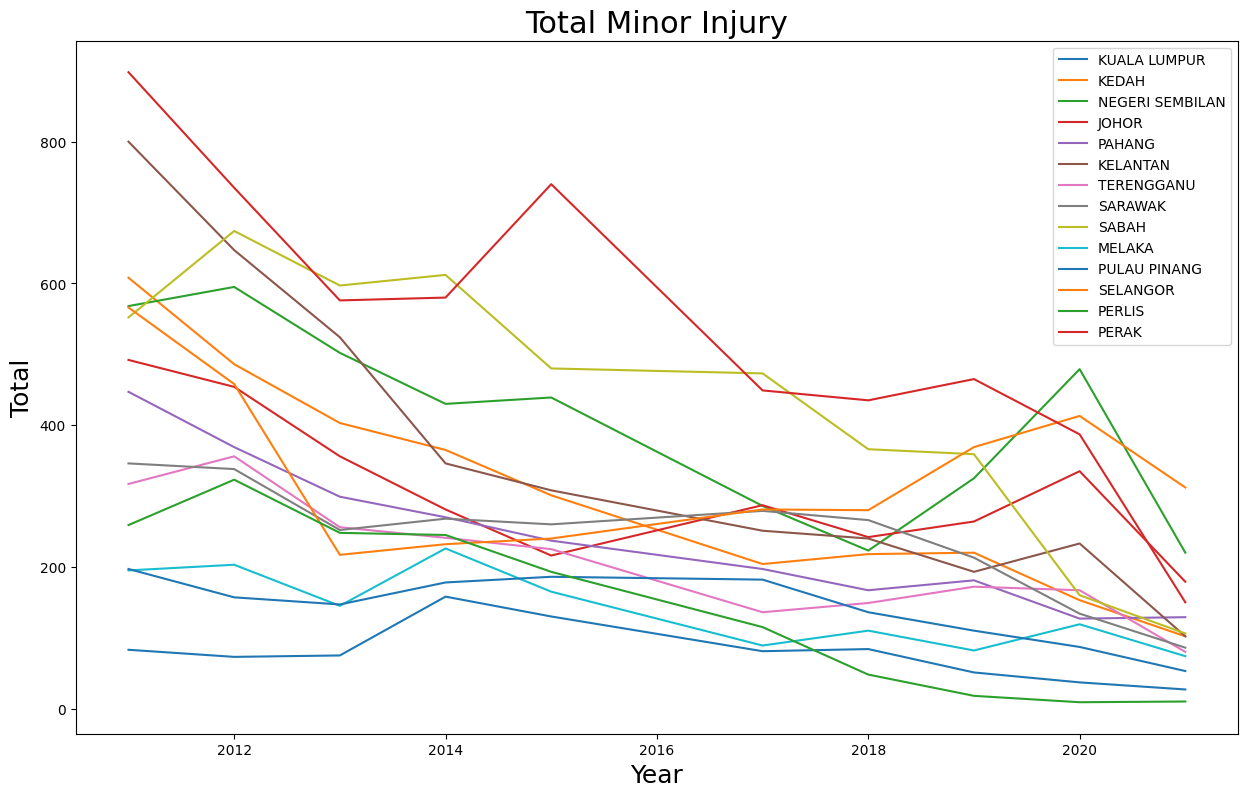

In [ ]:
# set every state for line
State_set = set(minInjury['State'])


plt.figure()

plt.title('Total Minor Injury', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = minInjury.loc[minInjury['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total minor injury'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()

In [ ]:
# to select column
majInjury = accident_df[['Year','State','Total major injury']]

majInjury

,Year,State,Total major injury
0,2011,PERLIS,288
1,2011,KEDAH,1329
2,2011,PULAU PINANG,380
3,2011,PERAK,1631
4,2011,SELANGOR,807
...,...,...,...
135,2021,PAHANG,189
136,2021,KELANTAN,803
137,2021,TERENGGANU,89
138,2021,SABAH,122


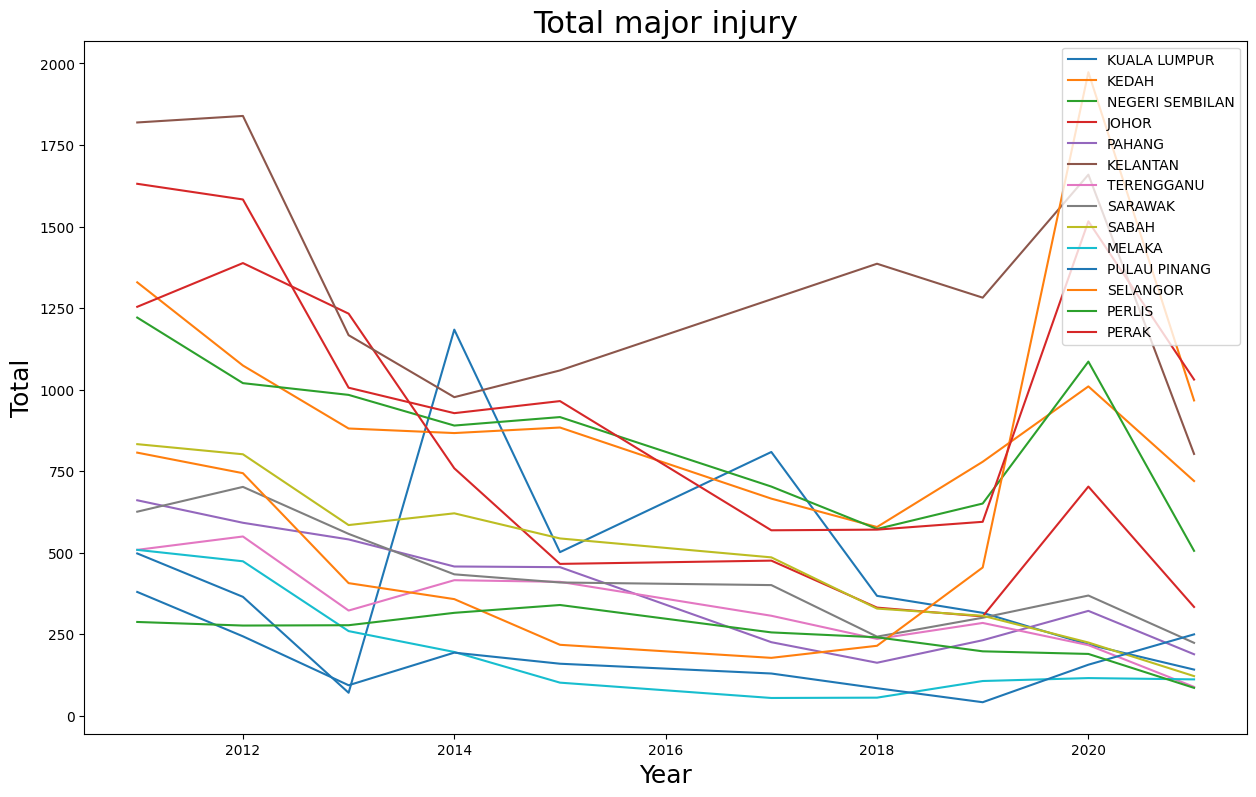

In [ ]:
# set every state for line
State_set = set(majInjury['State'])


plt.figure()

plt.title('Total major injury', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total', fontsize=18)

for country in State_set:

      # set numeric value, every state 1 number(because string)
     selected_data = majInjury.loc[majInjury['State'] == country]

     # plot  x and y
     plt.plot(selected_data['Year'], selected_data['Total major injury'], label=country)
     
plt.legend( fontsize="10", loc ="upper right")
plt.show()